In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import datetime
from textblob import TextBlob

nltk_data_path = "../data/libs/nltk_data"
nltk.data.path.append(nltk_data_path)

In [29]:
garminconnect_df = pd.read_csv("../data/processed/20250313_1413_garminconnect_df_cleaned.csv")
garminconnect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125178 entries, 0 to 125177
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              125178 non-null  object
 1   userName              125178 non-null  object
 2   userImage             125178 non-null  object
 3   content               125178 non-null  object
 4   score                 125178 non-null  int64 
 5   thumbsUpCount         125178 non-null  int64 
 6   reviewCreatedVersion  118529 non-null  object
 7   at                    125178 non-null  object
 8   replyContent          3815 non-null    object
 9   repliedAt             3815 non-null    object
 10  appVersion            118529 non-null  object
 11  clean_content         125178 non-null  object
dtypes: int64(2), object(10)
memory usage: 11.5+ MB


In [30]:
# Function to extract sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(str(text))  # Ensure text is string
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis on 'clean_content'
garminconnect_df[['polarity', 'subjectivity']] = garminconnect_df['clean_content'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# Optional: Categorize sentiment into positive, neutral, negative
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

garminconnect_df['sentiment_label'] = garminconnect_df['polarity'].apply(categorize_sentiment)

# Preview the results
print(garminconnect_df[['clean_content', 'polarity', 'subjectivity', 'sentiment_label']].head())

                                       clean_content  polarity  subjectivity  \
0  hate new layout try figure load previous versi... -0.038552      0.552357   
1                             love help tremendously  0.416667      0.800000   
2                                      good carefree  0.700000      0.600000   
3  late update not_allow create workout category ... -0.300000      0.600000   
4             much well fitbit no_issue sync workout  0.200000      0.200000   

  sentiment_label  
0         neutral  
1        positive  
2        positive  
3        negative  
4        positive  


In [31]:
date_today = datetime.datetime.today().strftime("%Y%m%d_%H%M")
garminconnect_df.to_csv(f"../data/processed/{date_today}_garminconnect_df_cleaned_sentiment_textblob.csv", index=False)

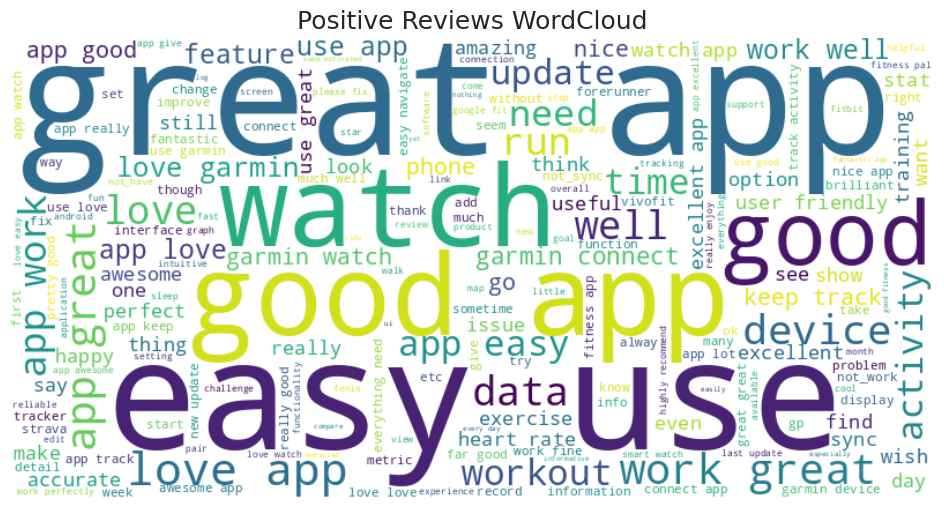

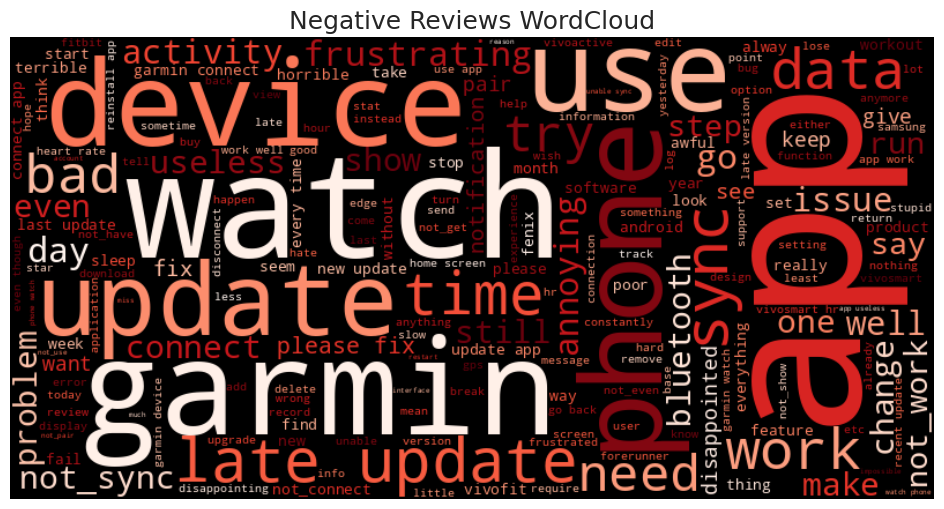

In [32]:
# Separate positive and negative texts
positive_text = " ".join(garminconnect_df[garminconnect_df['sentiment_label'] == 'positive']['clean_content'].dropna())
negative_text = " ".join(garminconnect_df[garminconnect_df['sentiment_label'] == 'negative']['clean_content'].dropna())

# Generate word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

# Plot Positive WordCloud
plt.figure(figsize=(12, 6))
plt.title("Positive Reviews WordCloud", fontsize=18)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Plot Negative WordCloud
plt.figure(figsize=(12, 6))
plt.title("Negative Reviews WordCloud", fontsize=18)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.show()